In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/content/drive/MyDrive/unsupervised_data.csv')
data

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
0,1,-21.904591,-22.659091,12.805995,-46.631935,-34.347081,-21.989738
1,2,-28.662385,68.757081,31.761821,3.982259,-62.876866,-61.838563
2,3,-62.551204,60.909235,8.112918,24.110050,-64.372336,70.681940
3,4,14.428024,-48.326045,-65.576518,76.027549,69.966852,48.023953
4,5,9.780285,-55.643172,-72.737299,74.180123,67.873327,41.128015
...,...,...,...,...,...,...,...
39995,39996,19.126649,-53.397074,-73.297148,69.415535,75.729247,54.485823
39996,39997,-3.768855,-32.785832,22.813179,-50.865346,-36.385833,-28.710921
39997,39998,-10.519365,51.354702,-45.129637,1.941843,13.162370,-77.770009
39998,39999,47.122315,-47.272906,-47.184628,-52.908391,-29.804291,2.042820


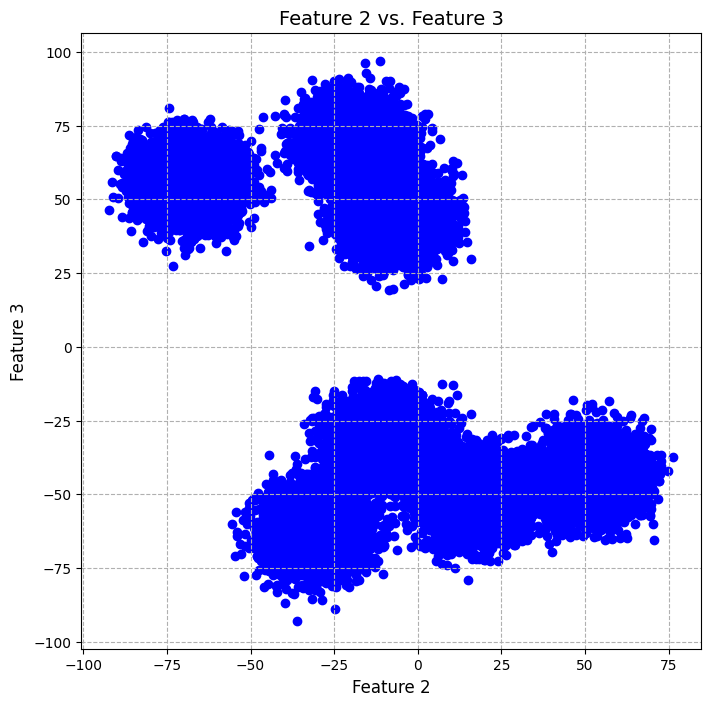

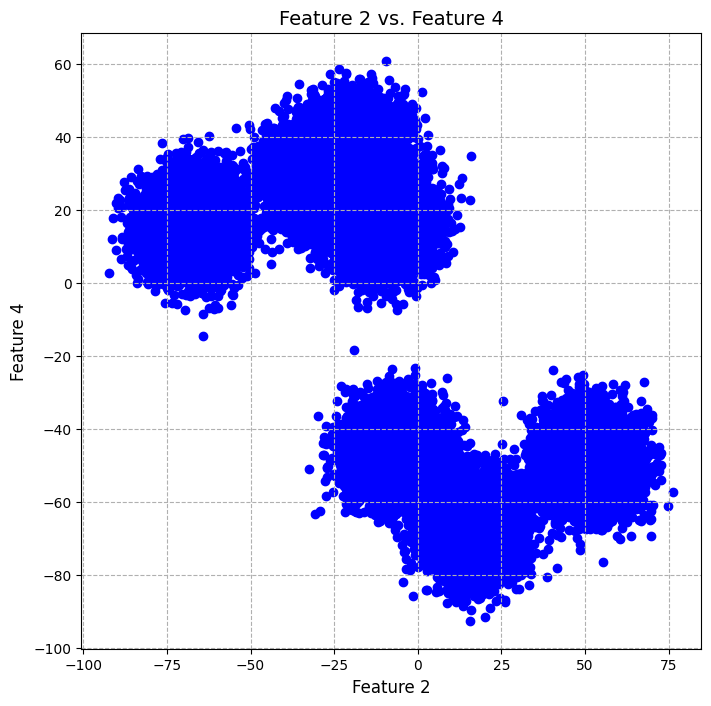

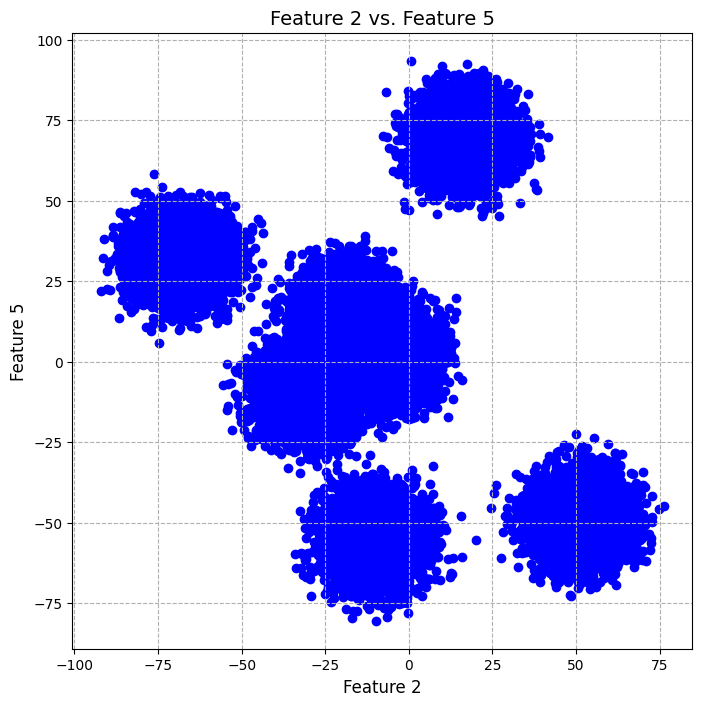

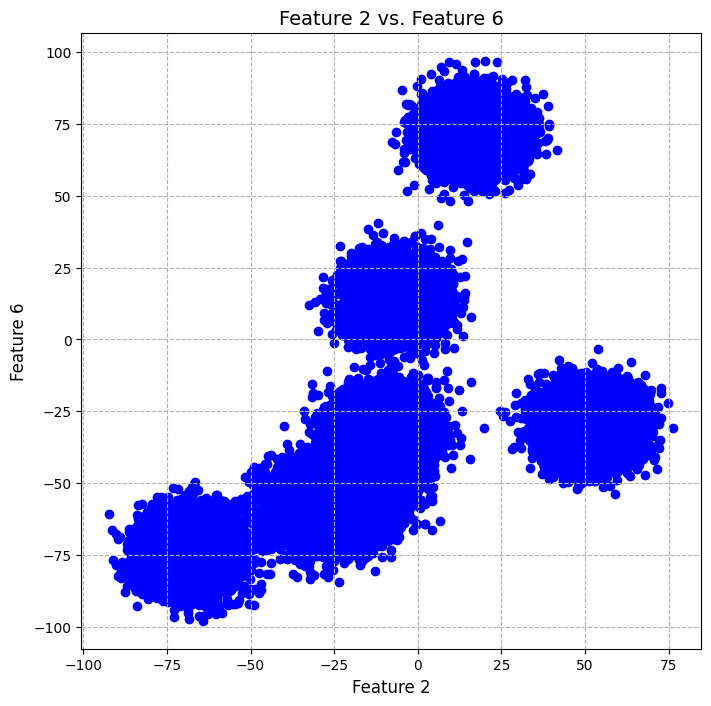

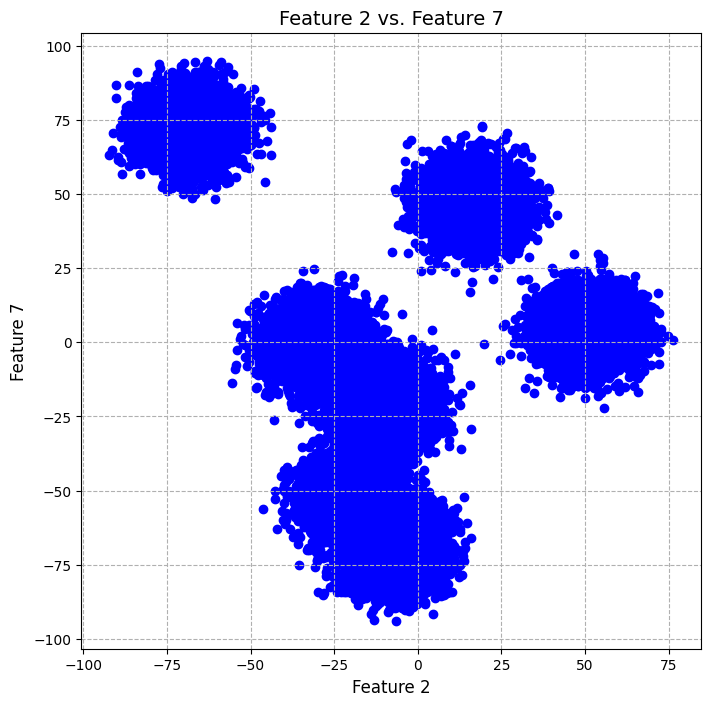

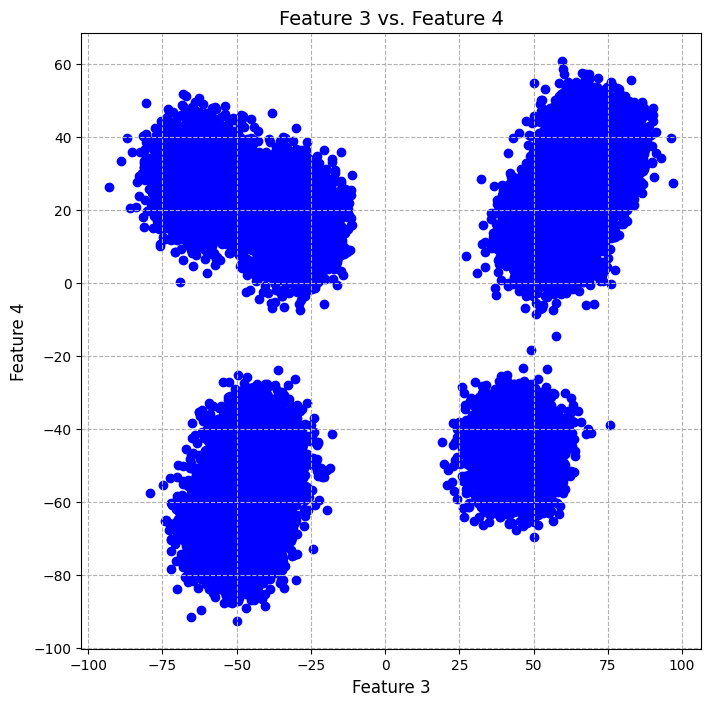

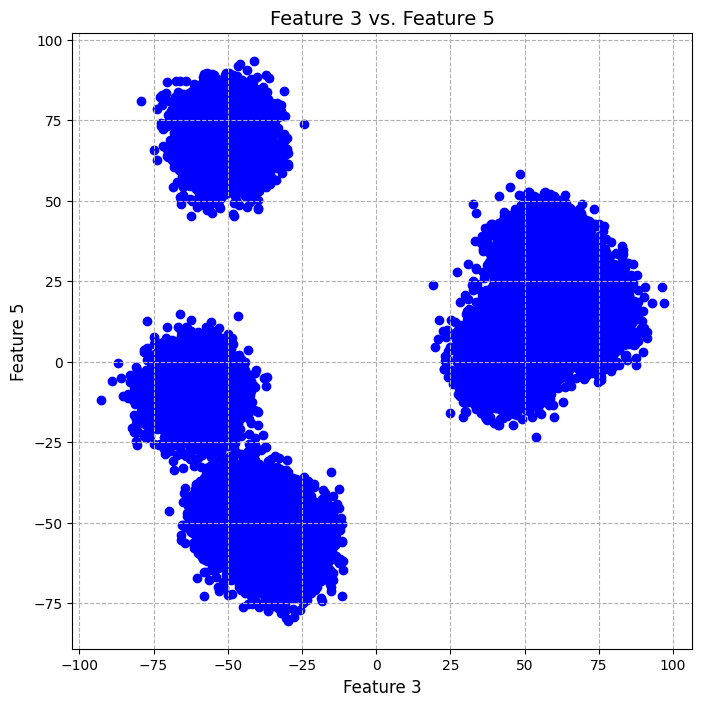

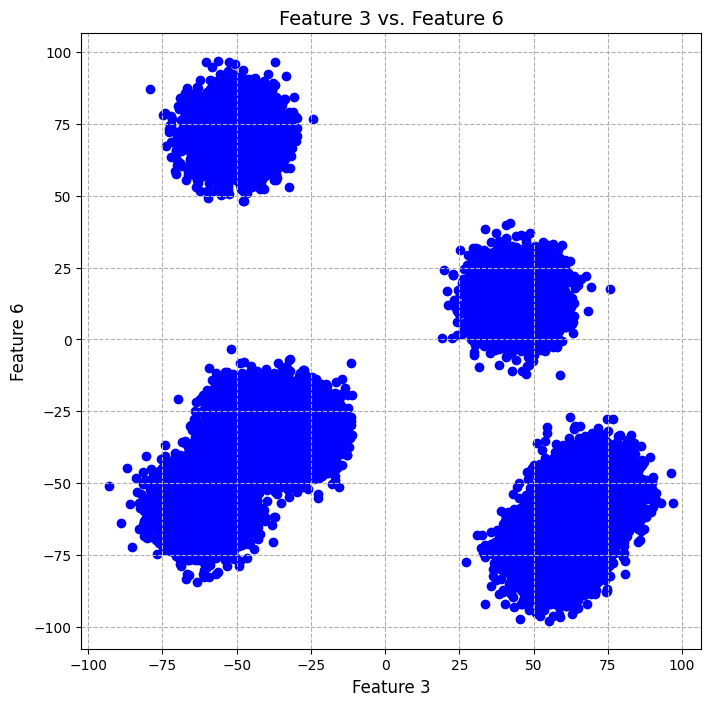

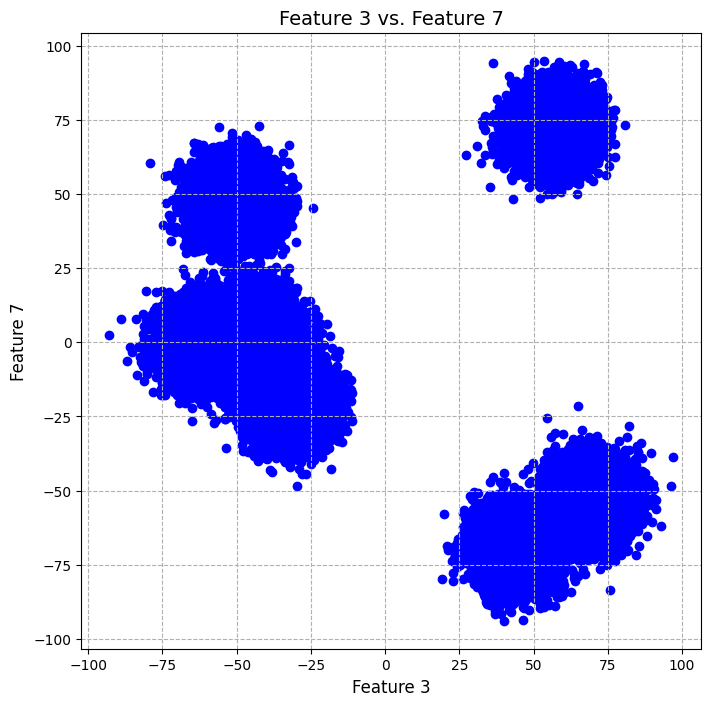

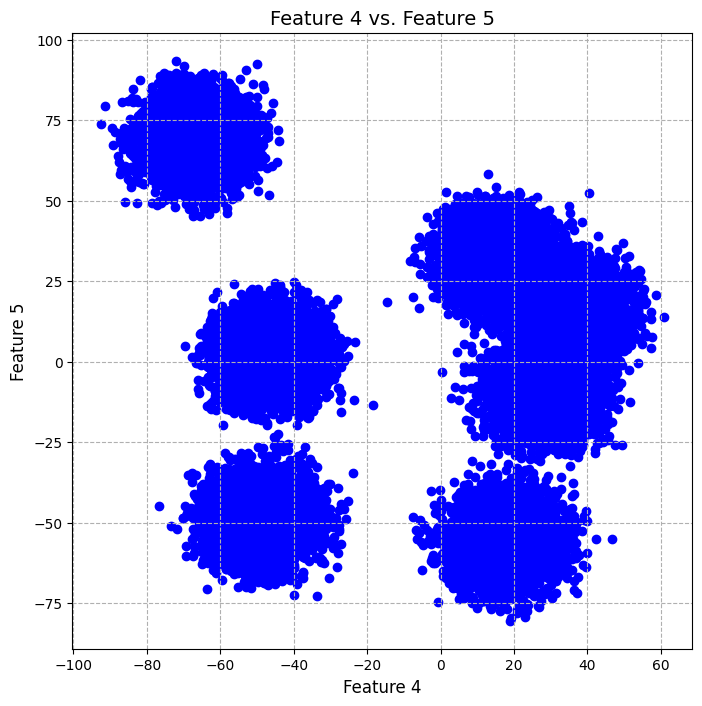

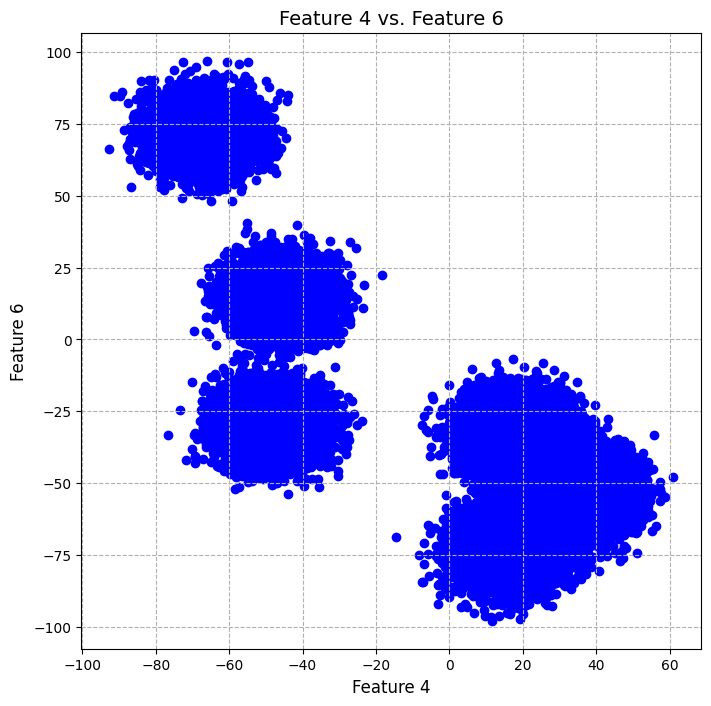

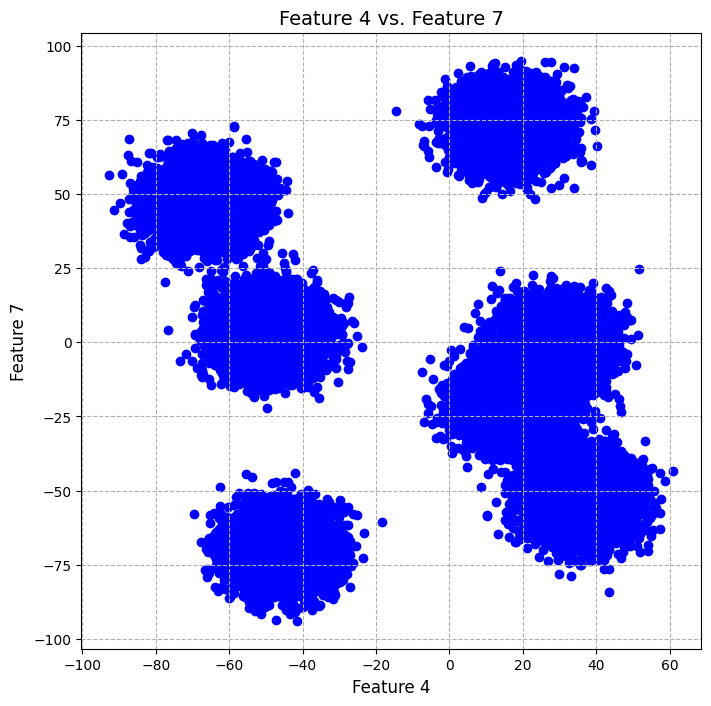

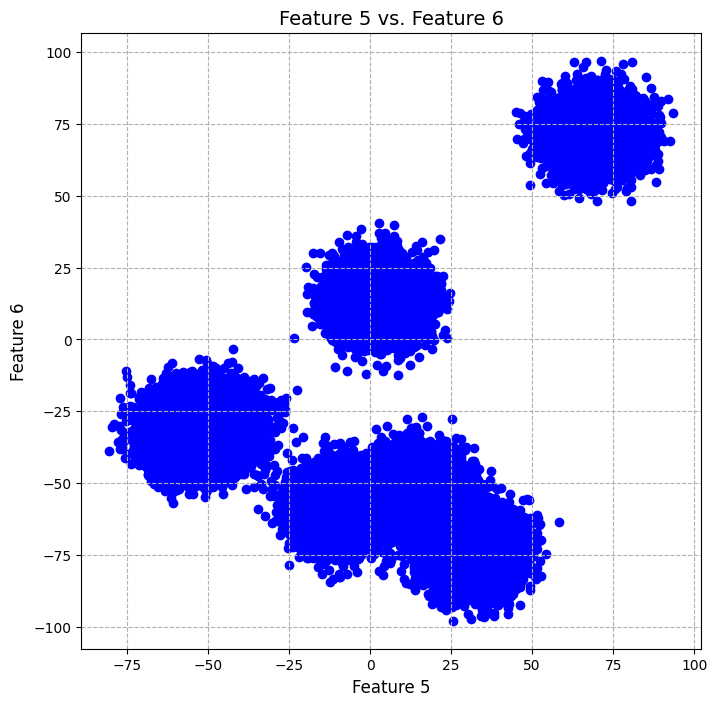

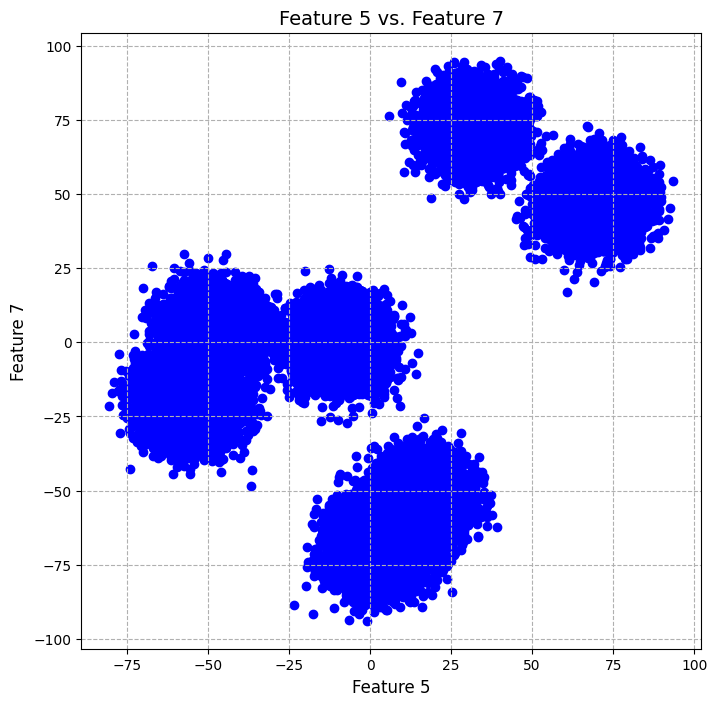

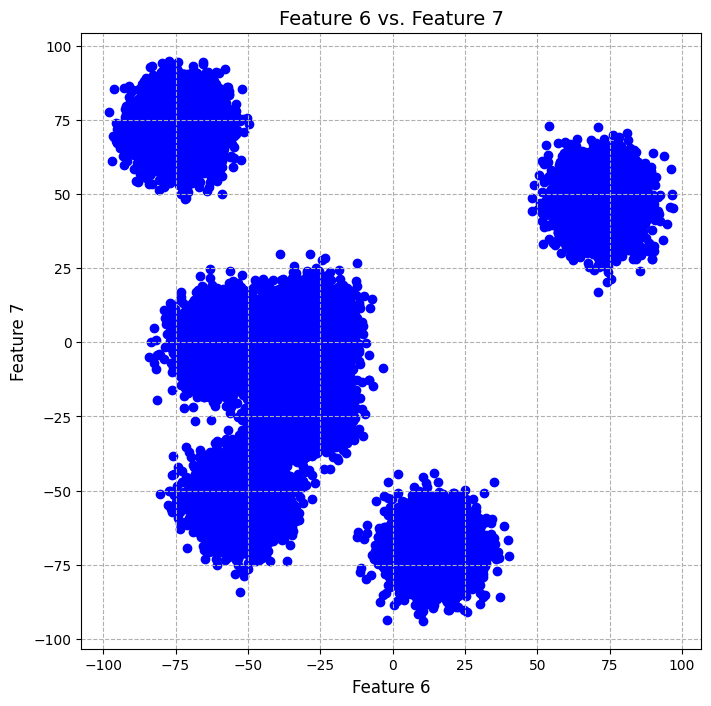

In [15]:
for i in range(1,7):  # Loop through features
    for j in range(i + 1, 7):
        plt.figure(figsize=(8, 8), dpi=100)
        plt.scatter(data.iloc[:, i], data.iloc[:, j],  color='blue')

        plt.title(f"Feature {i + 1} vs. Feature {j + 1}", fontsize=14)
        plt.xlabel(f"Feature {i + 1}", fontsize=12)
        plt.ylabel(f"Feature {j + 1}", fontsize=12)

        plt.grid(True, linestyle='--')
        plt.show()
        print('\n' * 2)

In [16]:
data_arr = np.array(data)
X = data_arr[:,1:7]
X.shape

(40000, 6)

In [19]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        distance = []
        for j in range(K):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        idx[i] = np.argmin(distance)

    return idx

def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for i in range(K):
        points = X[idx == i]
        if points.shape[0] > 0:
            centroids[i] = np.mean(points, axis=0)
        else:
            centroids[i] = centroids[i]  # No points assigned, keep centroid as is
    return centroids

def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, iteration):
    # Plot all data points and color them based on their cluster assignment
    for k in range(K):
        points = X[idx == k]
        plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {k}")

    # Plot current centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

    # Draw lines showing centroid movement
    for j in range(centroids.shape[0]):
        plt.plot([previous_centroids[j, 0], centroids[j, 0]], [previous_centroids[j, 1], centroids[j, 1]], 'k--')

    plt.title(f"Iteration {iteration + 1}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.pause(0.5)

def initialize_centroids(X, K):
    m = X.shape[0]
    centroids = np.zeros((K, X.shape[1]))

    # Randomly choose the first centroid
    centroids[0] = X[np.random.choice(m)]

    # Now select the remaining centroids using K-Means++ initialization
    for i in range(1, K):
        distances = np.array([min(np.linalg.norm(x - centroids[j])**2 for j in range(i)) for x in X])
        probabilities = distances / distances.sum()  # Probability distribution
        cumulative_probabilities = probabilities.cumsum()

        # Select the next centroid based on cumulative probabilities
        r = np.random.rand()
        next_centroid = np.searchsorted(cumulative_probabilities, r)
        centroids[i] = X[next_centroid]

    return centroids

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    for i in range(max_iters):
        # Output progress
        print(f"K-Means iteration {i+1}/{max_iters}")

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)

        # Check for convergence (if centroids do not change)


    plt.show()

    return centroids, idx


K-Means iteration 1/10


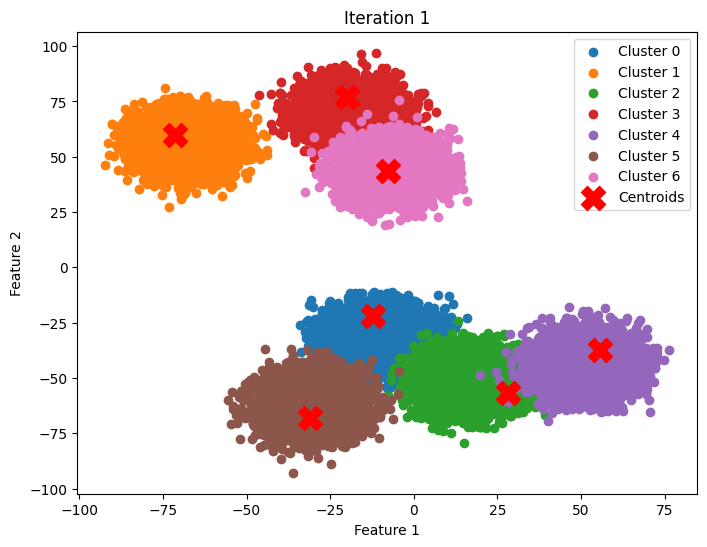

K-Means iteration 2/10


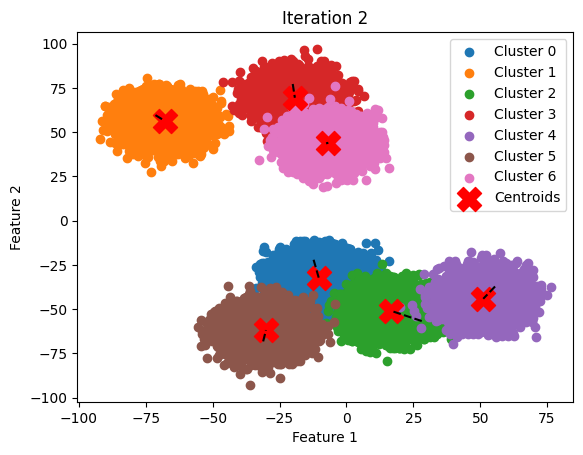

K-Means iteration 3/10


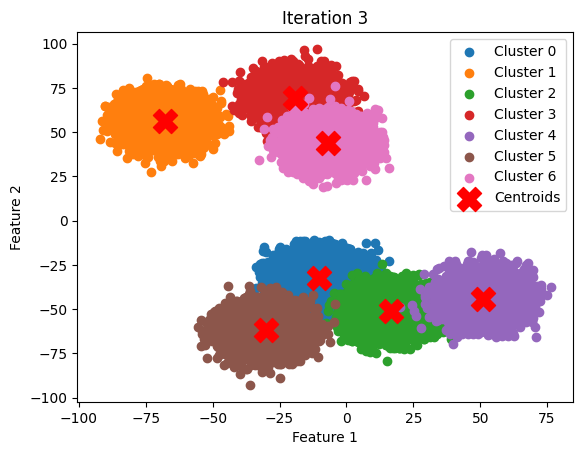

K-Means iteration 4/10


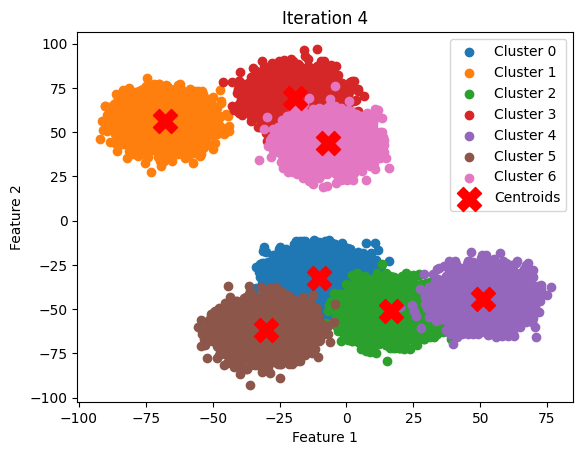

K-Means iteration 5/10


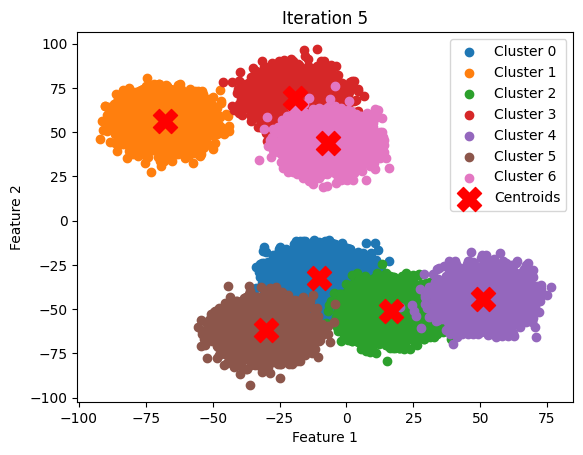

K-Means iteration 6/10


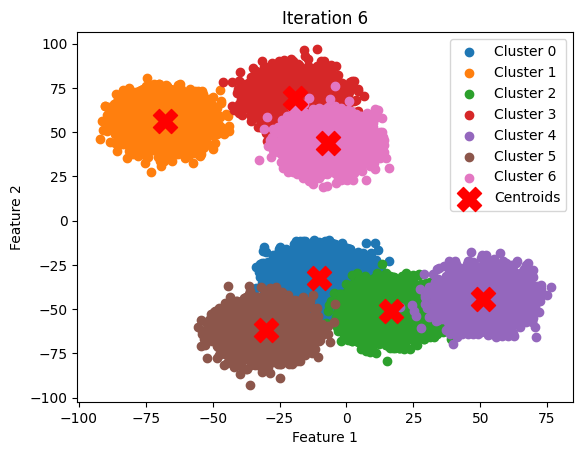

K-Means iteration 7/10


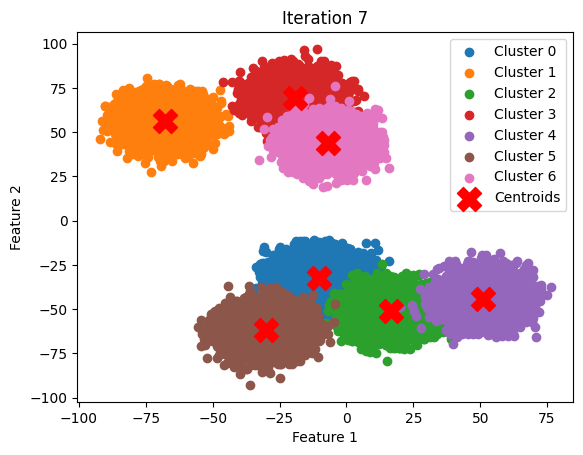

K-Means iteration 8/10


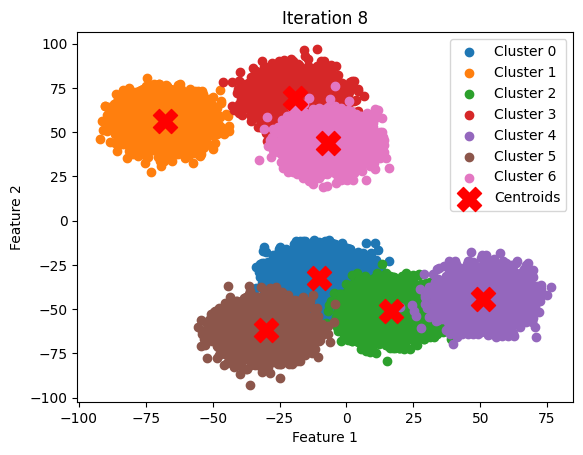

K-Means iteration 9/10


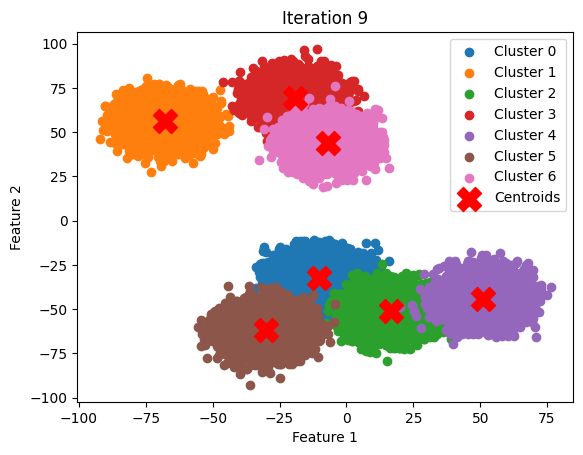

K-Means iteration 10/10


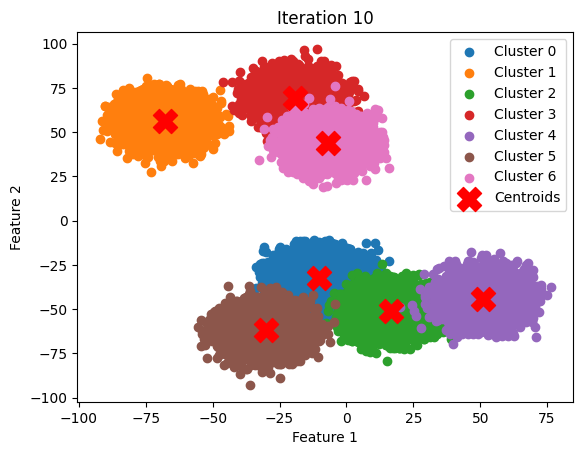

In [20]:
K = 7
initial_centroids = initialize_centroids(X, K)
# Run the K-Means algorithm
centroids, idx = run_kMeans(X, initial_centroids, max_iters=10, plot_progress=True)